In [26]:
%reload_ext autoreload
%autoreload 2

In [3]:
from visualstoryteller.getonepic import getonepic

[nltk_data] Downloading package brown to /Users/ger/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [4]:
text = "The brown bear goes to get some strawberries to the forest"

32768/30136 [================================] - 0s 0us/step


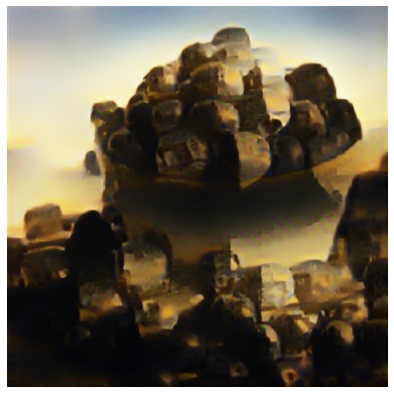

Thanks to Joanna Kosinska and Jude Beck for the pictures
Profiles: https://unsplash.com/@joannakosinska and https://unsplash.com/@judebeck


In [5]:
result = getonepic(text, show_result=True)
print(f"Thanks to {result['content'][1]} and {result['style'][1]} for the pictures")
print(f"Profiles: {result['content'][2]} and {result['style'][2]}")

In [10]:
import numpy as np
img = np.array(result['image'][0])

In [16]:
list_image = list(img.reshape(384*384*3))

In [17]:
array_image = np.array(list_image).reshape((384,384,3))

In [3]:
from visualstoryteller.getmorepics import getmorepics
from visualstoryteller.getmorepics_onestyle import getmorepics_onestyle

In [24]:
text = "because you took so much time to pee, and now you dance around, we lost all the money in coins"

In [5]:
result = getmorepics(text)


16384/13611 [====================================] - 0s 0us/step


In [19]:
import matplotlib.pyplot as plt

In [23]:
lenn = len(result['image'])
plt.figure(figsize=(13,4))
for i in range(lenn):
    plt.subplot(1, lenn, i+1)
    plt.imshow(result['image'][i][0])
    plt.axis(False)
plt.show()

49152/45144 [================================] - 0s 0us/step


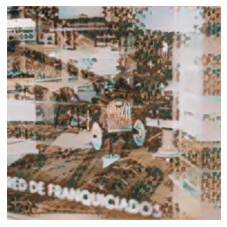

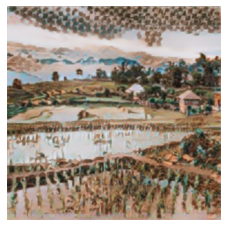

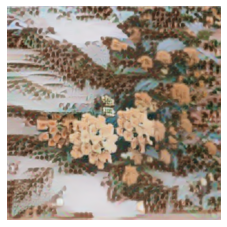

In [8]:
result = getmorepics_onestyle(text)
lenn = len(result['image'])
for i in range(lenn):
    plt.figure(figsize=(13,4))
    plt.subplot(1,lenn,i+1)
    plt.imshow(result['image'][i][0])
    plt.axis(False)

In [1]:
from visualstoryteller.getmorewords import get_more_words

In [4]:
text = "They’ve been working so hard in this crisis, many of them have died. Shadow health secretary Jonathan Ashworth says the government's proposed 1% NHS pay rise in England is a 'kick in the teeth' for staff."
print(get_more_words(text,14))

(['crisis', 'Shadow', 'health', 'secretary', 'Jonathan', 'Ashworth', 'governments', 'NHS', 'pay', 'rise', 'England', 'kick', 'teeth', 'staff'], ['died', 'thinks', 'some', 'Is', 'Working', 'have', 'hospital', 'because', 'because', 'few', 'has', 'toughest', 'difficult', 'work', 'been', 'already', 'seemed', 'proposes', 'had', 'perished', 'countless', 'so', 'Tough', 'Has', 'Work', 'propose', 'seem', 'proposing'])


40960/33805 [====================================] - 0s 1us/step


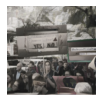

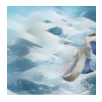

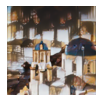

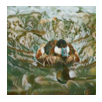

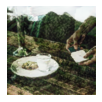

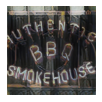

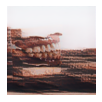

In [1]:
import matplotlib.pyplot as plt
from visualstoryteller.getmorepics_twonouns import getmorepics_twonouns
text = 'dog eat cat on beach run run red sky')
lenn = len(result['image'])
for i in range(lenn):
    plt.figure(figsize=(13,4))
    plt.subplot(1,lenn,i+1)
    plt.imshow(result['image'][i][0])
    plt.axis(False)

In [3]:
result

{'image': [<tf.Tensor: shape=(1, 384, 384, 3), dtype=float32, numpy=
  array([[[[0.5669636 , 0.5591943 , 0.55080974],
           [0.56756645, 0.55914176, 0.5572825 ],
           [0.5742402 , 0.56756765, 0.5677438 ],
           ...,
           [0.42072213, 0.42332914, 0.39968455],
           [0.36761552, 0.3795553 , 0.36813968],
           [0.40187633, 0.406928  , 0.37123054]],
  
          [[0.60191864, 0.5883791 , 0.5821149 ],
           [0.6044986 , 0.58861595, 0.5904374 ],
           [0.6037364 , 0.591666  , 0.5920053 ],
           ...,
           [0.428386  , 0.426575  , 0.40470535],
           [0.38451552, 0.39328277, 0.37907267],
           [0.41927278, 0.41832742, 0.37965846]],
  
          [[0.6232289 , 0.6149027 , 0.6011816 ],
           [0.6286732 , 0.61508536, 0.6095288 ],
           [0.6233487 , 0.6122536 , 0.6082161 ],
           ...,
           [0.42701665, 0.42615253, 0.39396197],
           [0.38780242, 0.39258373, 0.37551582],
           [0.4118748 , 0.4104469 , 0.3695